# SpaceX Data Analysis
###  Maximilian Wilhelm 02.12.2021

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data (perform EDA, provide error handlings, unit tests, data quality tests, etc)
* Step 3: Define the Data Model/ Null/Alternative Hypothesis
* Step 4: Show the Model of  Data and any conclutions
* Step 5: Complete Project Write Up

In [120]:
# Do all imports and installs here
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import optimize
import scipy.stats as stats
import pylab as pl
from numpy.polynomial import Polynomial

### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

In [121]:
# Read in the data here
# no decimals in csv
spacex = pd.read_csv('spacex.csv', sep=',')

In [122]:
spacex.head()
spacex

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN
5,F1-4,28 September 2008,23:15,Marshall Islands,Falcon 1,RatSat (DemoSat),NaN,165.0,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,NaN,NaN
6,F1-5,14 July 2009,03:35,Marshall Islands,Falcon 1,RazakSAT,Weather Satellite,180.0,Low Earth Orbit,ATSB,Government,Malaysia,Success,NaN,NaN,NaN
7,F9-1,4 June 2010,18:45,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Dragon Spacecraft Qualification Unit,NaN,NaN,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,Parachute,Failure
8,F9-2,8 December 2010,15:43,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C1),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,Parachute,Failure
9,F9-3,22 May 2012,07:44,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C2+),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN


### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

In [123]:
# Performing cleaning tasks here
spacex.info()
sns.set_theme(style='darkgrid', palette='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight Number      41 non-null     object 
 1   Launch Date        41 non-null     object 
 2   Launch Time        41 non-null     object 
 3   Launch Site        41 non-null     object 
 4   Vehicle Type       41 non-null     object 
 5   Payload Name       41 non-null     object 
 6   Payload Type       38 non-null     object 
 7   Payload Mass (kg)  33 non-null     float64
 8   Payload Orbit      36 non-null     object 
 9   Customer Name      39 non-null     object 
 10  Customer Type      39 non-null     object 
 11  Customer Country   39 non-null     object 
 12  Mission Outcome    41 non-null     object 
 13  Failure Reason     8 non-null      object 
 14  Landing Type       28 non-null     object 
 15  Landing Outcome    21 non-null     object 
dtypes: float64(1), object(15)
me

**Finds:**
1. Payload and Customer Information are irrelevant for the Data Analysis
2. Every column except Payload Mass (kg) is an object type. Check for duplicates.
3. No Information about the duplicates can be stated yet. Permon countplots. 

Check Object Data

<AxesSubplot:xlabel='Flight Number', ylabel='count'>

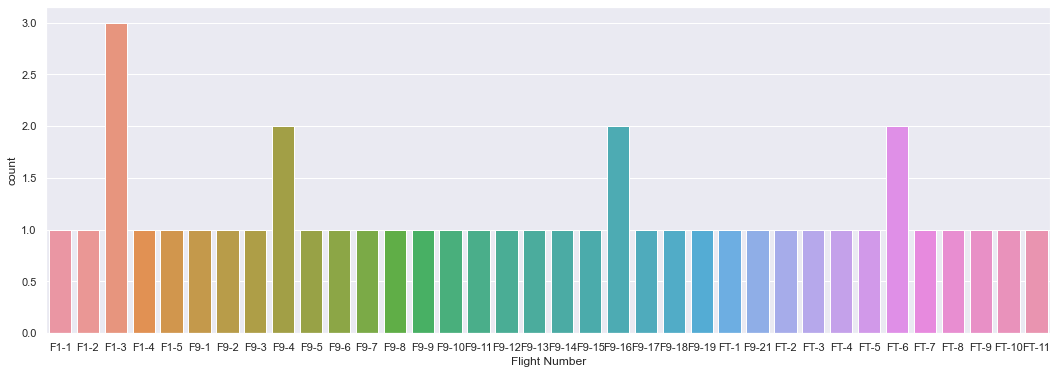

In [124]:
# Prepare Plot
plt.figure(figsize=(18,6))

# Check columns for duplicates
sns.countplot(x='Flight Number', data=spacex)
# sns.countplot(x='Launch Date', data=spacex)
# sns.countplot(x='Launch Time', data=spacex)

<AxesSubplot:xlabel='Launch Site', ylabel='count'>

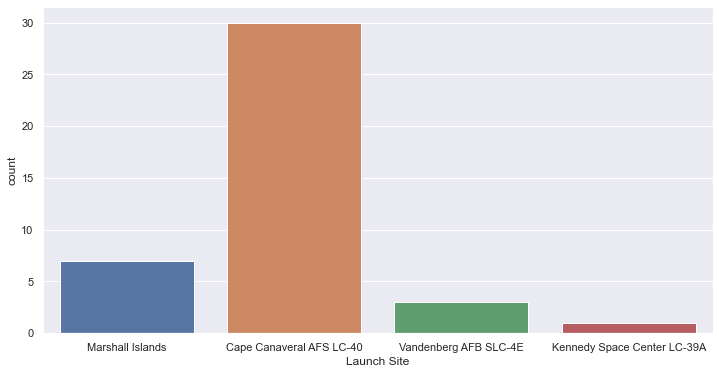

In [125]:
# Prepare Plot
plt.figure(figsize=(12,6))

# Check columns for duplicates
sns.countplot(x='Launch Site', data=spacex)

<AxesSubplot:xlabel='Vehicle Type', ylabel='count'>

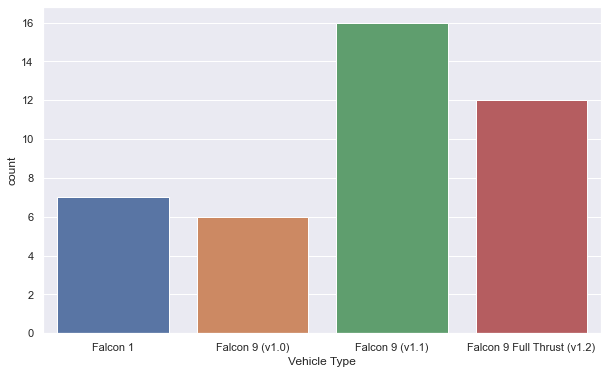

In [126]:
# Prepare Plot
plt.figure(figsize=(10,6))

# Check columns for duplicates
sns.countplot(x='Vehicle Type', data=spacex)

<AxesSubplot:xlabel='Mission Outcome', ylabel='count'>

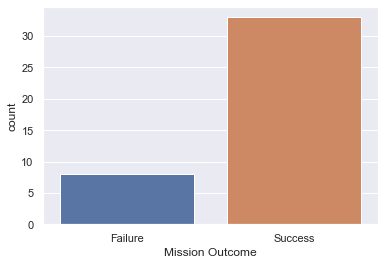

In [127]:
# Check columns for duplicates
sns.countplot(x='Mission Outcome', data=spacex)

<AxesSubplot:xlabel='Failure Reason', ylabel='count'>

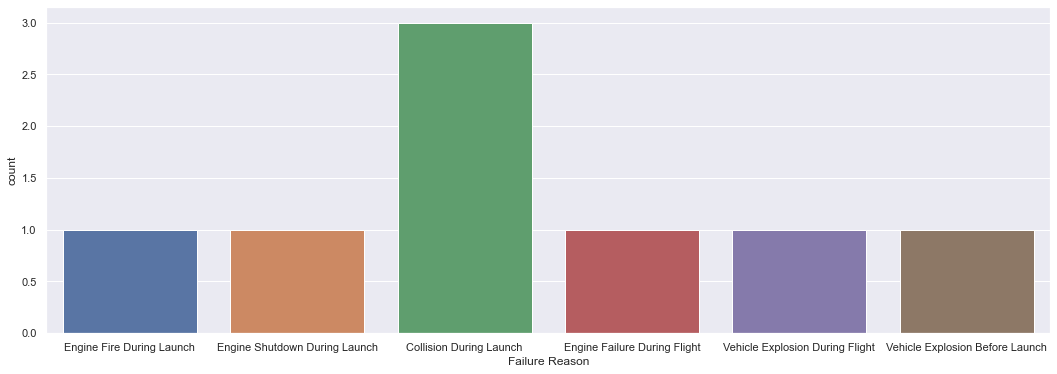

In [128]:
# Prepare Plot
plt.figure(figsize=(18,6))

# Check columns for duplicates
sns.countplot(x='Failure Reason', data=spacex)

<AxesSubplot:xlabel='Landing Type', ylabel='count'>

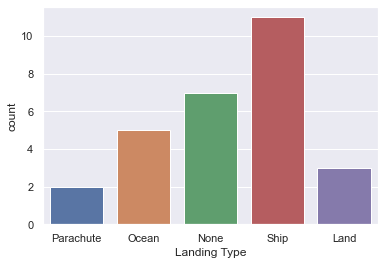

In [129]:
# Check columns for duplicates
sns.countplot(x='Landing Type', data=spacex)

<AxesSubplot:xlabel='Landing Outcome', ylabel='count'>

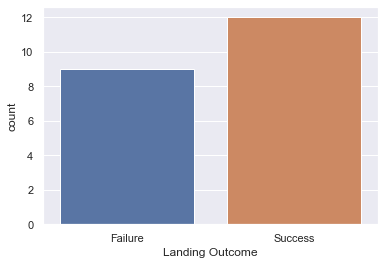

In [130]:
# Check columns for duplicates
sns.countplot(x='Landing Outcome', data=spacex)

**Finds:**
1. dsfdfd


Check for missing Data

In [131]:
# Check for missing Data
nan_values = spacex.isna()
nan_columns = nan_values.any()
columns_with_nan = spacex.columns[nan_columns].tolist()
print('Missing Data in: ', columns_with_nan)

Missing Data in:  ['Payload Type', 'Payload Mass (kg)', 'Payload Orbit', 'Customer Name', 'Customer Type', 'Customer Country', 'Failure Reason', 'Landing Type', 'Landing Outcome']


**Finds:**
1. 9 Columns miss some values
2. Only 4 columns are relevant: Payload Mass, Failure Reason, Landing Type, Landing Outcome

**Output Columns in Question**

In [132]:
# Show relevant Columns with NaN values
nan_spacex = spacex[['Payload Type', 'Payload Mass (kg)', 'Mission Outcome', 'Failure Reason', 'Landing Type', 'Landing Outcome']]
nan_spacex

,Payload Type,Payload Mass (kg),Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,Research Satellite,19.5,Failure,Engine Fire During Launch,NaN,NaN
1,NaN,NaN,Failure,Engine Shutdown During Launch,NaN,NaN
2,Communication Satellite,NaN,Failure,Collision During Launch,NaN,NaN
3,Research Satellites,8.0,Failure,Collision During Launch,NaN,NaN
4,Human Remains,NaN,Failure,Collision During Launch,NaN,NaN
5,NaN,165.0,Success,NaN,NaN,NaN
6,Weather Satellite,180.0,Success,NaN,NaN,NaN
7,NaN,NaN,Success,NaN,Parachute,Failure
8,Space Station Supplies,NaN,Success,NaN,Parachute,Failure
9,Space Station Supplies,NaN,Success,NaN,NaN,NaN


**Finds:**
1. Logically the Payload Mass should correlate with the Payload Type. If there is Payload it should have a weight.
2. Same with Mission Outcome and Failure Reason
3. Same with Landing Outcome and Landing type

In [133]:
# Divide Data - Payload
nan_spacex_payload = nan_spacex[['Payload Type', 'Payload Mass (kg)']]

# Delete Rows with non NaN values
nan_spacex_payload = nan_spacex_payload[nan_spacex_payload.isna().any(axis=1)]

# Show NaN Values
nan_spacex_payload


,Payload Type,Payload Mass (kg)
1,NaN,NaN
2,Communication Satellite,NaN
4,Human Remains,NaN
5,NaN,165.0
7,NaN,NaN
8,Space Station Supplies,NaN
9,Space Station Supplies,NaN
17,Communication Satellite,NaN
28,Communication Satellite,NaN


In [139]:
# Divide Data - Failure
nan_spacex_failure = nan_spacex[['Mission Outcome', 'Failure Reason']]

# Delete Rows with non NaN values
nan_spacex_failure = nan_spacex_failure[nan_spacex_failure.isna().any(axis=1)]

# Show NaN Values
nan_spacex_failure

,Mission Outcome,Failure Reason
5,Success,NaN
6,Success,NaN
7,Success,NaN
8,Success,NaN
9,Success,NaN
10,Success,NaN
12,Success,NaN
13,Success,NaN
14,Success,NaN
15,Success,NaN


In [140]:
# Divide Data - Landing
nan_spacex_landing = nan_spacex[['Landing Type', 'Landing Outcome']]

# Delete Rows with non NaN values
nan_spacex_landing = nan_spacex_landing[nan_spacex_landing.isna().any(axis=1)]

# Show NaN Values
nan_spacex_landing

,Landing Type,Landing Outcome
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [135]:
# Toss out irrelevant Data
spacex = spacex[['Flight Number','Launch Date','Launch Time','Launch Site','Vehicle Type','Payload Type','Payload Mass (kg)','Mission Outcome','Failure Reason','Landing Type','Landing Outcome']]

# show Dataset
spacex

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Type,Payload Mass (kg),Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,Research Satellite,19.5,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,NaN,NaN,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Communication Satellite,NaN,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Research Satellites,8.0,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Human Remains,NaN,Failure,Collision During Launch,NaN,NaN
5,F1-4,28 September 2008,23:15,Marshall Islands,Falcon 1,NaN,165.0,Success,NaN,NaN,NaN
6,F1-5,14 July 2009,03:35,Marshall Islands,Falcon 1,Weather Satellite,180.0,Success,NaN,NaN,NaN
7,F9-1,4 June 2010,18:45,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),NaN,NaN,Success,NaN,Parachute,Failure
8,F9-2,8 December 2010,15:43,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Space Station Supplies,NaN,Success,NaN,Parachute,Failure
9,F9-3,22 May 2012,07:44,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Space Station Supplies,NaN,Success,NaN,NaN,NaN


### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chosen that model

#### 3.2 Hypothesis Tests
provide needed statistiks with explonation and answer to your business questions for the analysis

### Step 4: Show your solution: the Model of  Data and any conclutions 
#### 4.1 Create graphics, any needed queris to visualise your solution


In [136]:
# Write code here

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the dataframes. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [137]:
# Perform quality checks here

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies, algorithms, methodes for the project.
* Propose how often the data should be updated and why. What tools you are used for data simulation in case if it is needed.
* Write a description of how you would approach the problem differently if you have another data model or additinal information